[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]
(26, 2)


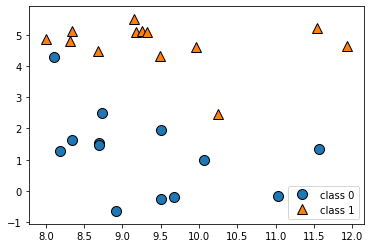

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import mglearn

X,y=mglearn.datasets.make_forge() #랜덤데이터셋
print(X)
print(y)
mglearn.discrete_scatter(X[:,0],X[:,1],y) #산점도
plt.legend(['class 0','class 1'],loc=4) #범례
print(X.shape) #데이터의 차원

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


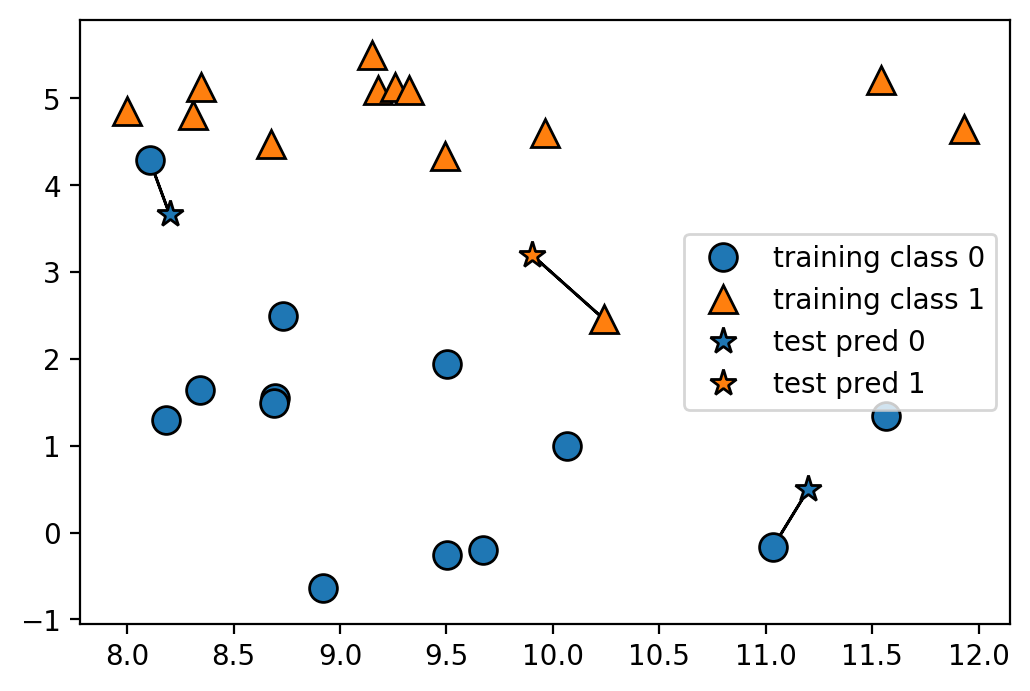

In [9]:
# k=1 일 경우 (가장 가까운 1개의 이웃)
plt.rcParams['figure.dpi']=200 #그래프 해상도
mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


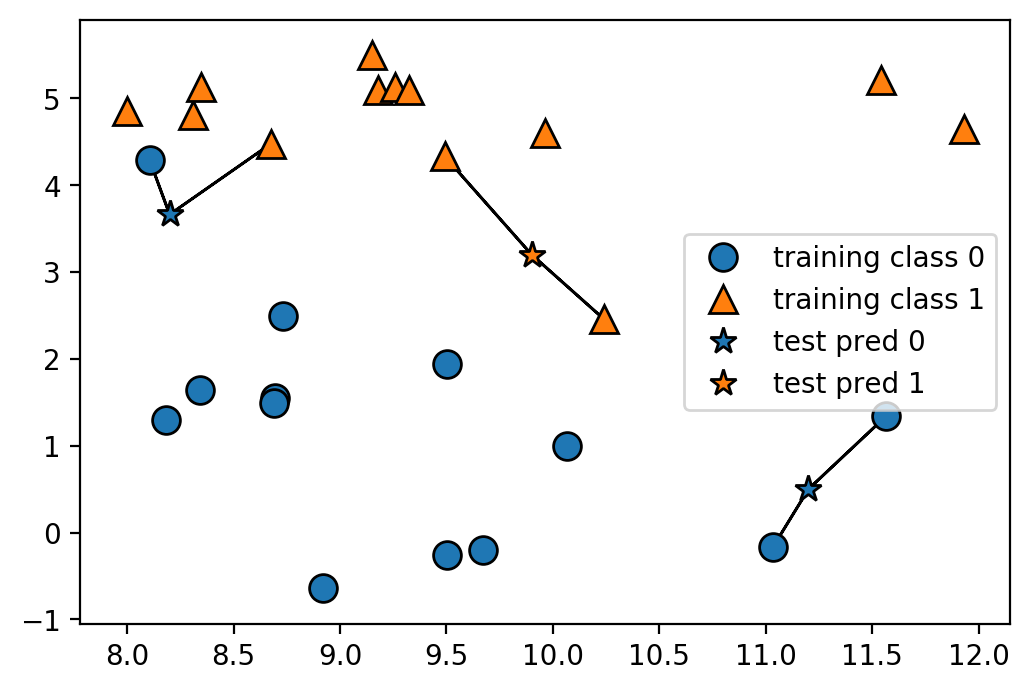

In [10]:
# k=2 일 경우 (가장 가까운 2개의 이웃)
#plt.rcParams['figure.dpi']=200 #그래프 해상도
mglearn.plots.plot_knn_classification(n_neighbors=2)

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


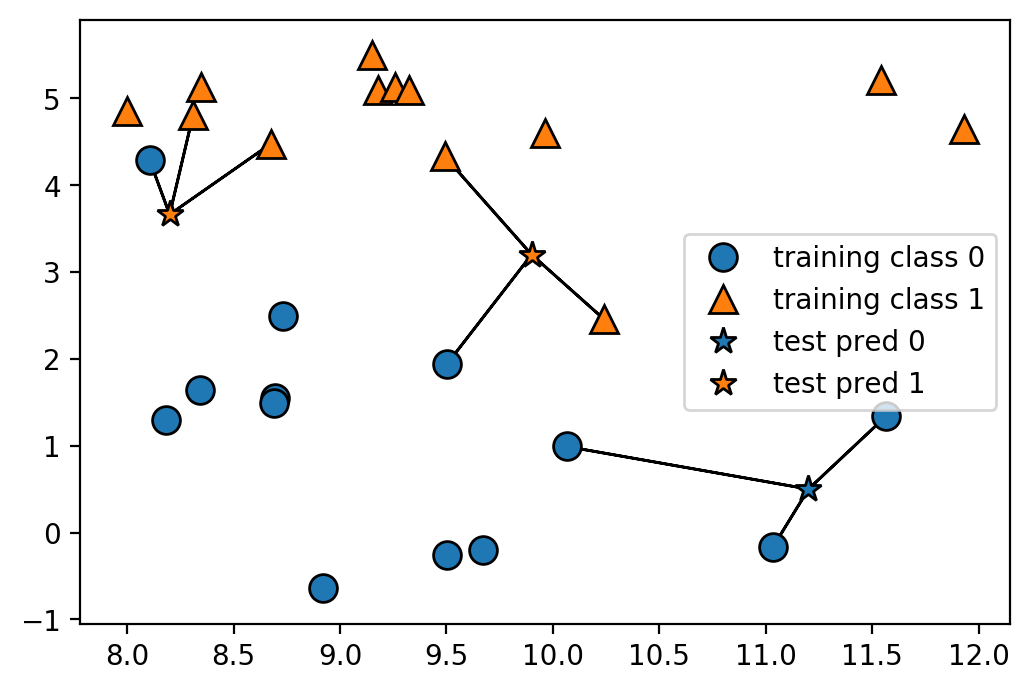

In [11]:
# k=3 일 경우 (가장 가까운 3개의 이웃)
mglearn.plots.plot_knn_classification(n_neighbors=3)

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


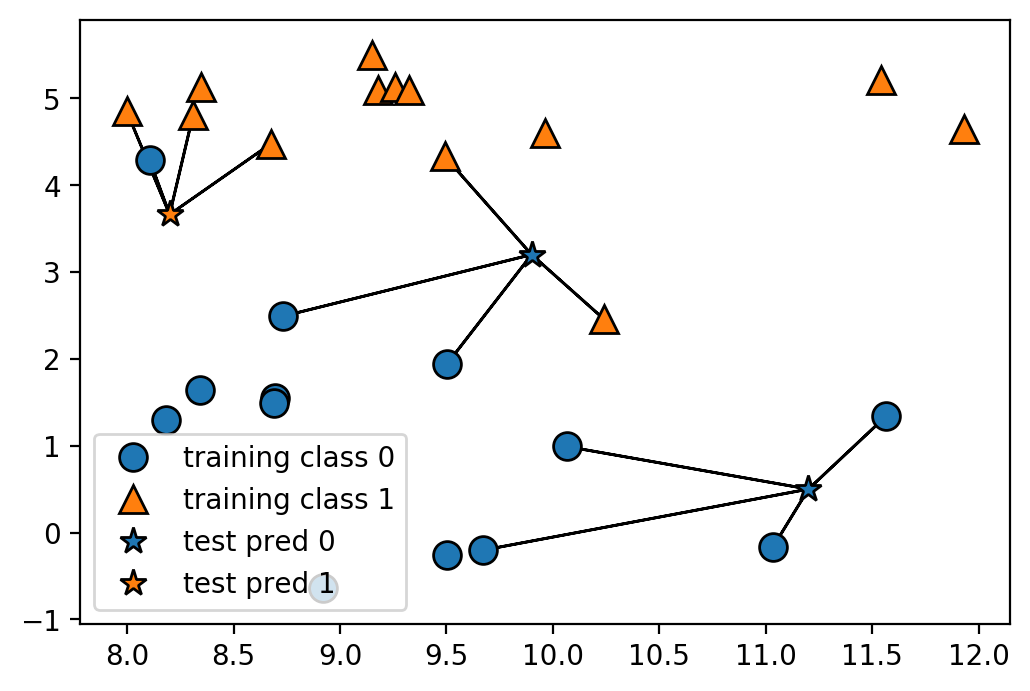

In [12]:
# k=4 일 경우 (가장 가까운 4개의 이웃)
mglearn.plots.plot_knn_classification(n_neighbors=4)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                random_state=0)
#knn 모형, 이웃3개
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

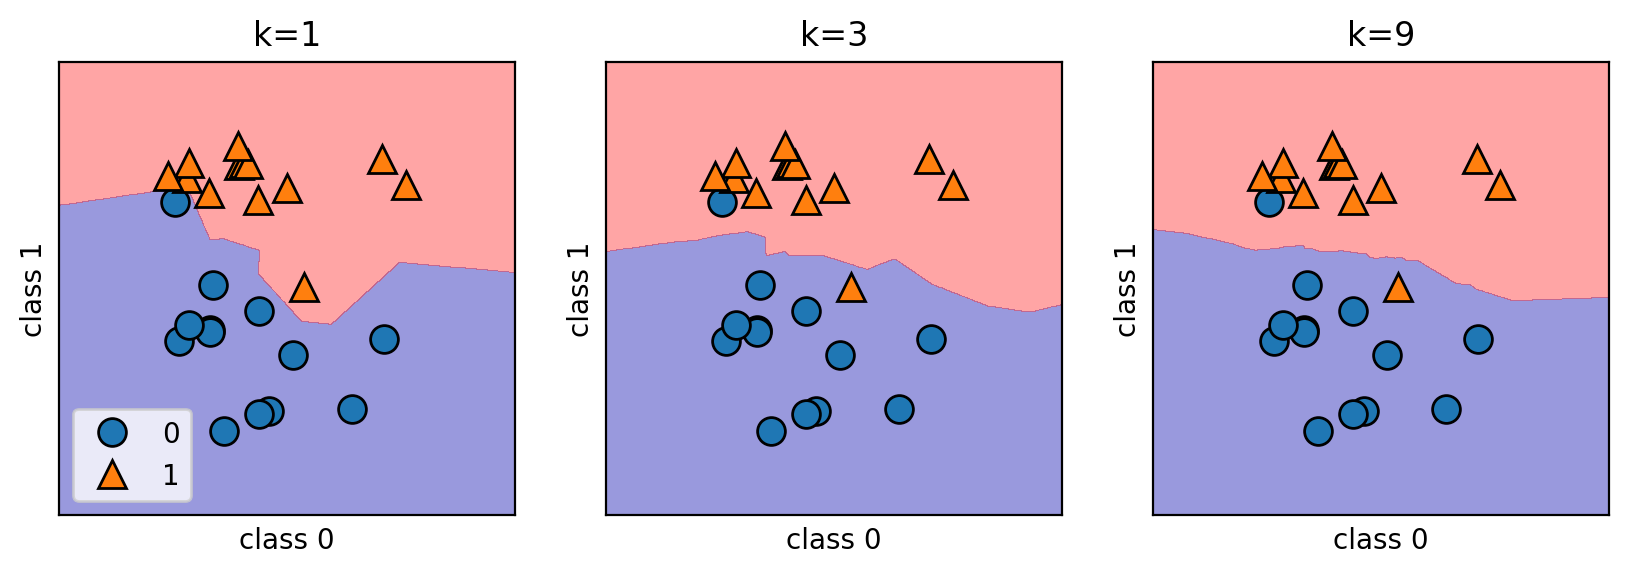

In [25]:
#최적의 이웃의 갯수를 구하는 과정
# subplots(row,cols) figsize(width,height)
fig, axes=plt.subplots(1,3,figsize=(10,3))

for n,ax in zip([1,3,9], axes):
    #이웃의 갯수를 1,3,9로 설정
    knn=KNeighborsClassifier(n_neighbors=n).fit(X,y)
    #구분선
    mglearn.plots.plot_2d_separator(knn,X,fill=True,ax=ax,alpha=0.4)
    #산점도
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title('k={}'.format(n)) #그래프의 타이틀
    ax.set_xlabel('class 0') #x축 라벨
    ax.set_ylabel('class 1') #y축 라벨
    
axes[0].legend(loc=3) #범례 위치 지정

In [23]:
import numpy as np
#예측정확도를 꼐산하는 방법1
pred=knn.predict(X_test)
print(knn.score(X_train,y_train)) #학습용 예측정확도
print(knn.score(X_test,y_test)) #검증용 예측정확도

pred1=knn.predict(X_train) #학습용 데이터셋으로 얻은 예측값
pred2=knn.predict(X_test) #검증용 데이터셋으로 얻은 예측값
print(pred1) #예측값
print(y_train) #실제값
print(pred2)
print(y_test)

#예측정확도를 계산하는 방법2
print(pred1 == y_train)
print('학습용 정확도:{:5.1f}%'.format(np.mean(pred1 ==y_train)*100))
print('검증용 정확도:{:5.1f}%'.format(np.mean(pred2 == y_test)*100))





0.95
0.8333333333333334
[0 0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0]
[0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 1 0 1 1]
[ True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True]
학습용 정확도: 95.0%
검증용 정확도: 83.3%
